# Multilayer Perceptrons Performance on Cifar100 dataset - Adam Optimizer
- Name: Minh T. Nguyen
- Date: 2/25/2023

In [1]:
# import libraries
import matplotlib.pyplot as plt
import collections

# import tensorflow
from tensorflow.keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

# 1. Data Visualization & Preprocessing
**Note**: 
- Let's download and visualize the cifar package.
- From the Keras API, we learned that there are 50k images for training and 10k images for testing, for both Cifar10 and Cifar100.

## 1.1. Data Visualization

In [2]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


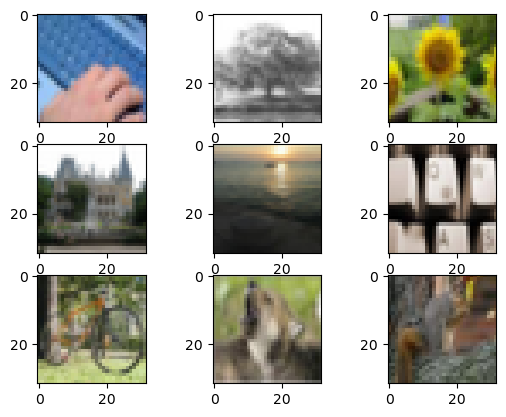

In [4]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Processing

In [5]:
# reshape images to RGB scale with width & height are size 32
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

# normalization to avoid gradient explode or vanish
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

In [6]:
# check sample
print(f"Training sample 1: {X_train[0]}\n")
print(f"Training sample 1 shape: {X_train[0].shape}\n")

print(f"Training label 1: {y_train[0]}\n")
print(f"Training label 1 shape: {y_test[0].shape}\n")

Training sample 1: [1.         1.         1.         ... 0.5411765  0.6784314  0.30980393]

Training sample 1 shape: (3072,)

Training label 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Training label 1 shape: (100,)



# 2. Modeling
**Note: **
- When constructing neural network layer in Keras, we can combine both Dense and Activation layer into 1 line. However, if we pursue this approach, we won't be able to exstract and visualize the output of each layer.
- It will be outrageous to construct all permutation of the case (72 cases per dataset!). Thus, for the experience, I will use 1 base model (MLP with 2 hidden layers). All 12 cases will be explored.

In [7]:
# dictionary to store all case
all_history = collections.defaultdict(dict)

In [8]:
# initialize parameters
num_epochs = 50
batch_size = 128

## 2.1. Case 1
- MLP Configuration: (1024, 512).
- Dropout: None.
- Optimizer: adam.

In [9]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

In [10]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# check model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
Total params: 3,722,852
Trainable params: 3,722,852
Non-

In [12]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


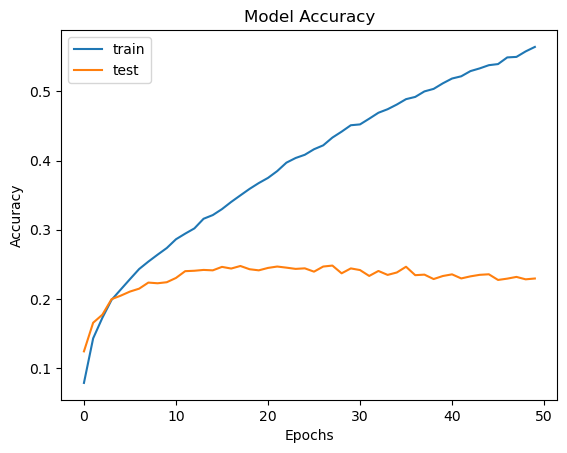

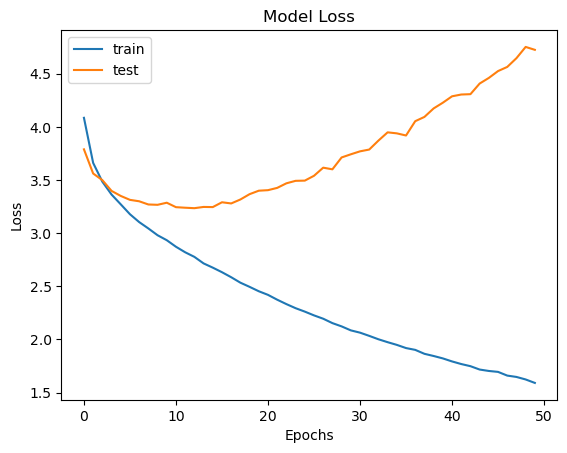

In [14]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# save training history to dictionary
all_history['case_1_train'] = history.history

In [16]:
# train model results
print('Train loss:', all_history['case_1_train']['loss'][-1])
print('Train acc:', all_history['case_1_train']['accuracy'][-1])

Train loss: 1.5911802053451538
Train acc: 0.5644000172615051


In [17]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 4.724273204803467
Test acc: 0.22939999401569366


In [18]:
# save testing history to dictionary
all_history['case_1_test'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.2. Case 2
- MLP Configuration: (1024, 512, 256).
- Dropout: None.
- Optimizer: adam.

In [19]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

In [20]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# check model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [22]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


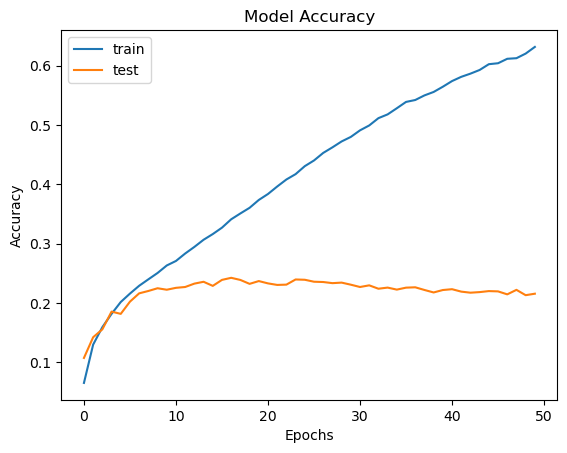

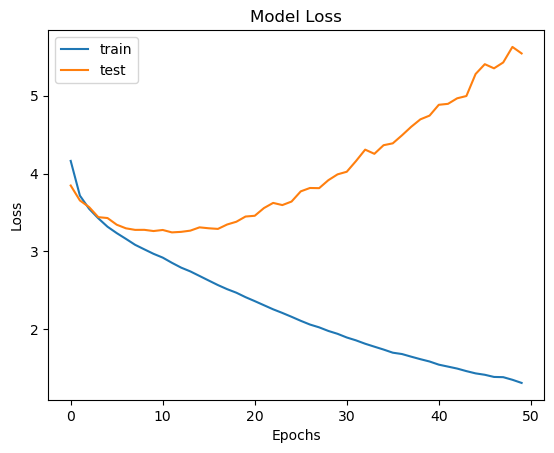

In [24]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# save training history to dictionary
all_history['case_2_train'] = history.history

In [26]:
# train model results
print('Train loss:', all_history['case_2_train']['loss'][-1])
print('Train acc:', all_history['case_2_train']['accuracy'][-1])

Train loss: 1.3133653402328491
Train acc: 0.6316199898719788


In [27]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 5.540979862213135
Test acc: 0.21549999713897705


In [28]:
# save testing history to dictionary
all_history['case_2_test'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.3. Case 3
- MLP Configuration: (1024, 512, 256, 128).
- Dropout: None.
- Optimizer: adam.

In [29]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('softmax'))

In [30]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
# check model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              3146752   
                                                                 
 activation_7 (Activation)   (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [32]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


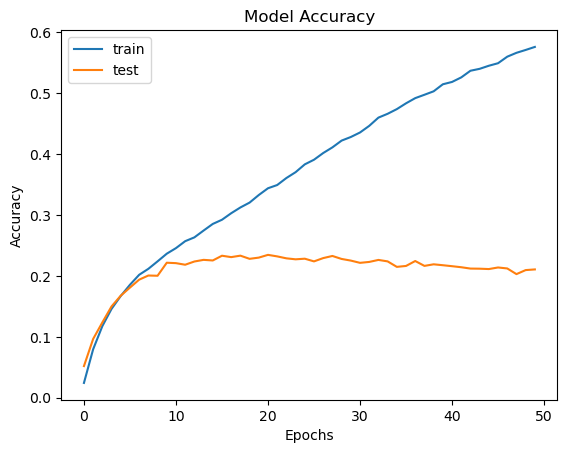

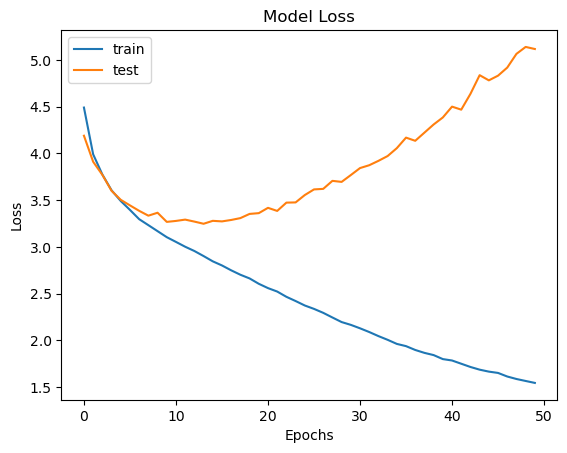

In [34]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# save training history to dictionary
all_history['case_3_train'] = history.history

In [36]:
# train model results
print('Train loss:', all_history['case_3_train']['loss'][-1])
print('Train acc:', all_history['case_3_train']['accuracy'][-1])

Train loss: 1.5436345338821411
Train acc: 0.5759999752044678


In [37]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 5.117213249206543
Test acc: 0.21070000529289246


In [38]:
# save testing history to dictionary
all_history['case_3_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

 ## 2.4. Case 4
- MLP Configuration: (1024, 512).
- Dropout: 0.2.
- Optimizer: adam.

In [39]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('softmax'))

In [40]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
# check model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_12 (Activation)  (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [42]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [43]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


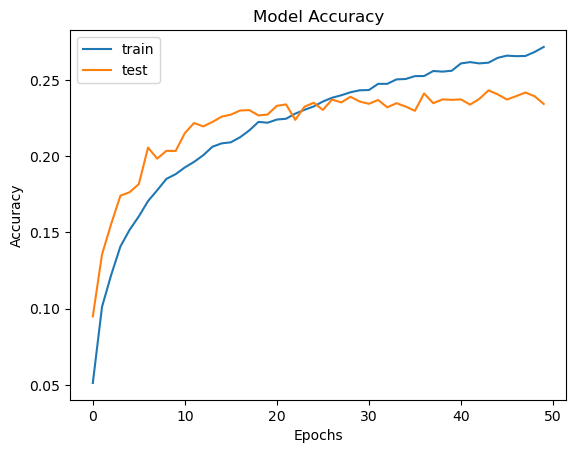

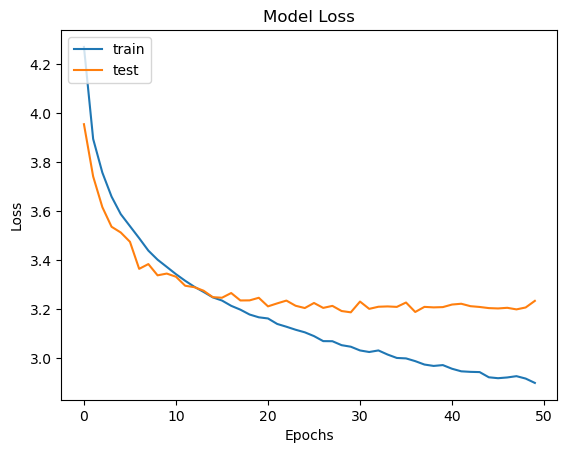

In [44]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# save training history to dictionary
all_history['case_4_train'] = history.history

In [46]:
# train model results
print('Train loss:', all_history['case_4_train']['loss'][-1])
print('Train acc:', all_history['case_4_train']['accuracy'][-1])

Train loss: 2.8986423015594482
Train acc: 0.2715800106525421


In [47]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 3.233323335647583
Test acc: 0.23420000076293945


In [48]:
# save testing history to dictionary
all_history['case_4_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.5. Case 5
- MLP Configuration: (1024, 512, 256).
- Dropout: 0.2.
- Optimizer: adam.

In [49]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('softmax'))

In [50]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# check model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_15 (Activation)  (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)              

In [52]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


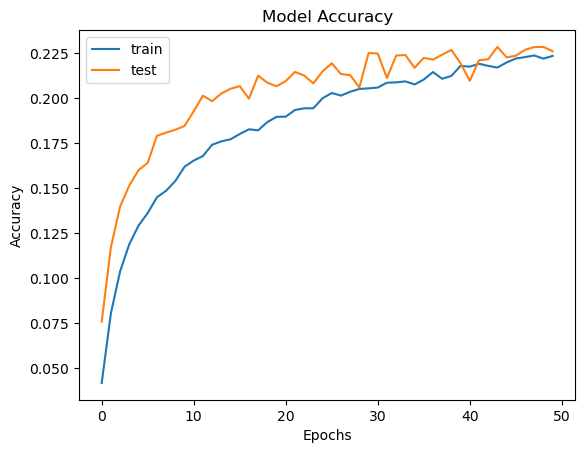

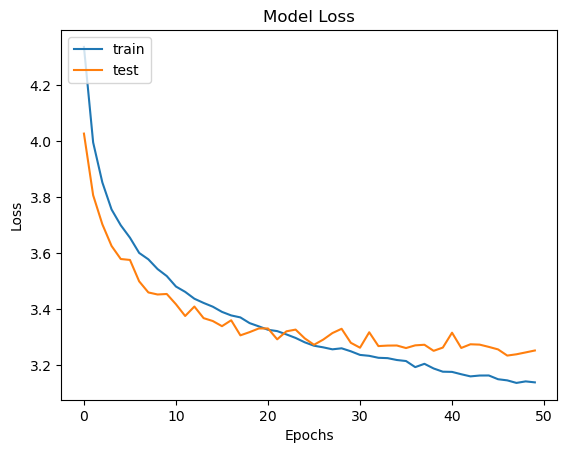

In [54]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# save training history to dictionary
all_history['case_5_train'] = history.history

In [56]:
# train model results
print('Train loss:', all_history['case_5_train']['loss'][-1])
print('Train acc:', all_history['case_5_train']['accuracy'][-1])

Train loss: 3.138423204421997
Train acc: 0.223580002784729


## 2.6. Case 6
- MLP Configuration: (1024, 512, 256, 128).
- Dropout: None.
- Optimizer: adam.

In [57]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('softmax'))

In [58]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
# check model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_19 (Activation)  (None, 1024)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               524800    
                                                                 
 activation_20 (Activation)  (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)              

In [60]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


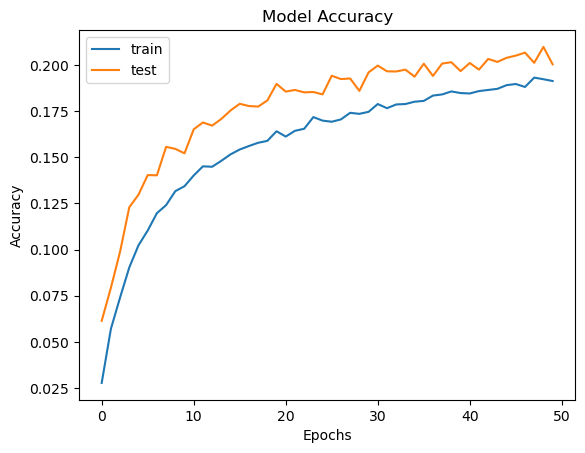

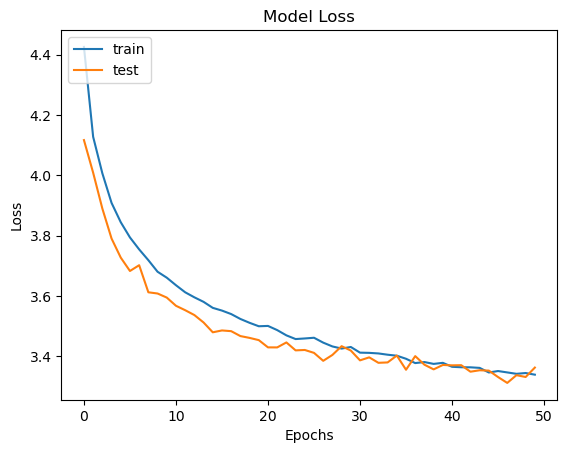

In [62]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
# save training history to dictionary
all_history['case_6_train'] = history.history

In [64]:
# train model results
print('Train loss:', all_history['case_6_train']['loss'][-1])
print('Train acc:', all_history['case_6_train']['accuracy'][-1])

Train loss: 3.338914394378662
Train acc: 0.19123999774456024


In [65]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 3.3624496459960938
Test acc: 0.20029999315738678


In [66]:
# save testing history to dictionary
all_history['case_6_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.7. Case 7
- MLP Configuration: (1024, 512).
- Dropout: 0.4.
- Optimizer: adam.

In [67]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(100))
model.add(Activation('softmax'))

In [68]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
# check model architecture
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_24 (Activation)  (None, 1024)              0         
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 activation_25 (Activation)  (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 100)              

In [70]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [71]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


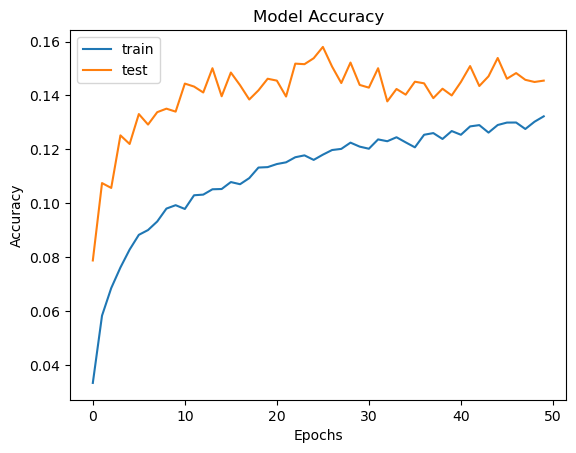

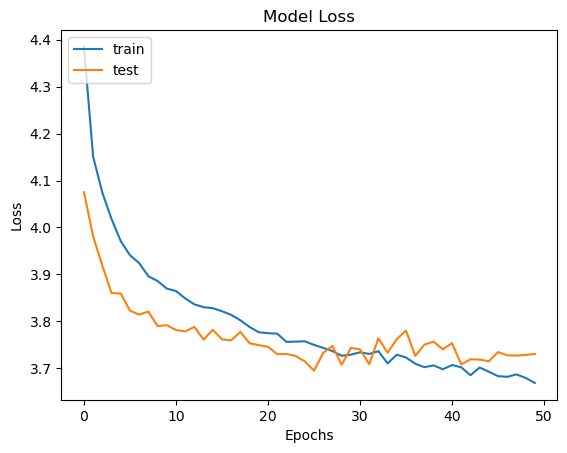

In [72]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# save training history to dictionary
all_history['case_7_train'] = history.history

In [74]:
# train model results
print('Train loss:', all_history['case_7_train']['loss'][-1])
print('Train acc:', all_history['case_7_train']['accuracy'][-1])

Train loss: 3.6687381267547607
Train acc: 0.13225999474525452


In [75]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 3.730437994003296
Test acc: 0.14550000429153442


In [76]:
# save testing history to dictionary
all_history['case_7_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.8. Case 8
- MLP Configuration: (1024, 512, 256).
- Dropout: 0.4.
- Optimizer: adam.

In [77]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(100))
model.add(Activation('softmax'))

In [78]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
# check model architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_27 (Activation)  (None, 1024)              0         
                                                                 
 dropout_11 (Dropout)        (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 activation_28 (Activation)  (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)              

In [80]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [81]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


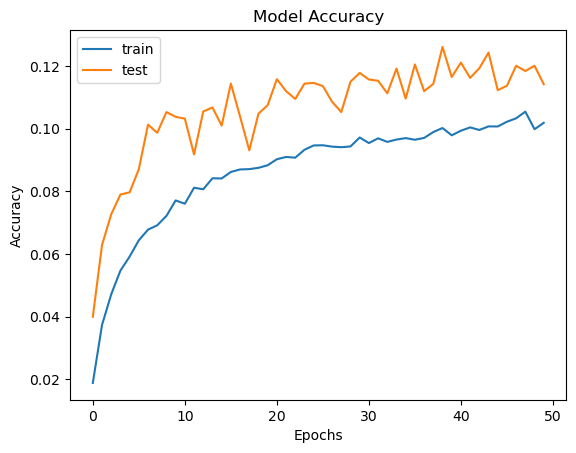

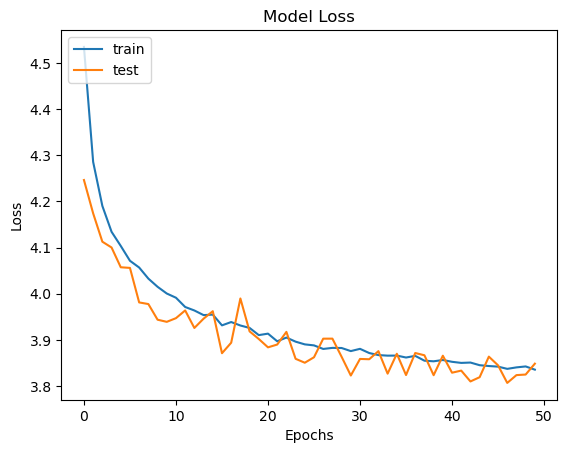

In [82]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
# save training history to dictionary
all_history['case_8_train'] = history.history

In [84]:
# train model results
print('Train loss:', all_history['case_8_train']['loss'][-1])
print('Train acc:', all_history['case_8_train']['accuracy'][-1])

Train loss: 3.835423231124878
Train acc: 0.10187999904155731


In [85]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 3.8483879566192627
Test acc: 0.11420000344514847


In [86]:
# save testing history to dictionary
all_history['case_8_test'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.9. Case 9
- MLP Configuration: (1024, 512, 256, 128).
- Dropout: 0.4.
- Optimizer: adam.

In [87]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(100))
model.add(Activation('softmax'))

In [88]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
# check model architecture
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_31 (Activation)  (None, 1024)              0         
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               524800    
                                                                 
 activation_32 (Activation)  (None, 512)               0         
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 256)              

In [90]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [91]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


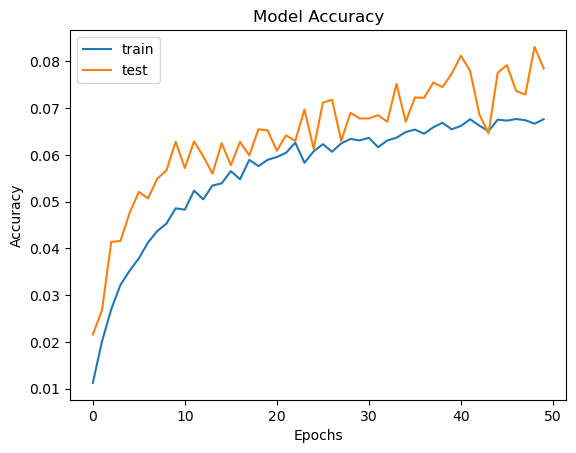

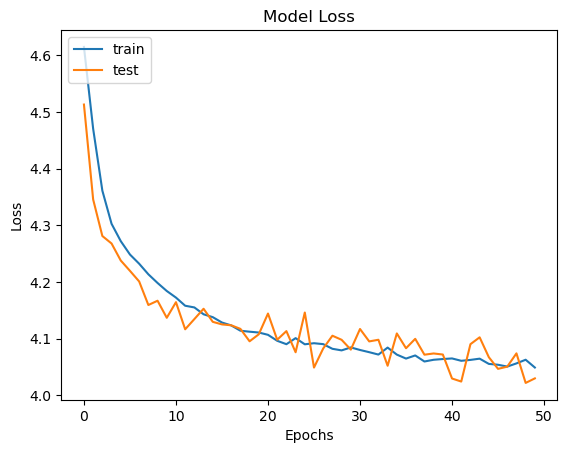

In [92]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
# save training history to dictionary
all_history['case_9_train'] = history.history

In [94]:
# train model results
print('Train loss:', all_history['case_9_train']['loss'][-1])
print('Train acc:', all_history['case_9_train']['accuracy'][-1])

Train loss: 4.048851013183594
Train acc: 0.06763999909162521


In [95]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 4.029671669006348
Test acc: 0.07850000262260437


In [96]:
# save testing history to dictionary
all_history['case_9_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.10. Case 10
- MLP Configuration: (1024, 512).
- Dropout: 0.6.
- Optimizer: adam.

In [97]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(100))
model.add(Activation('softmax'))

In [98]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [99]:
# check model architecture
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_36 (Activation)  (None, 1024)              0         
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 activation_37 (Activation)  (None, 512)               0         
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 100)              

In [100]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [101]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


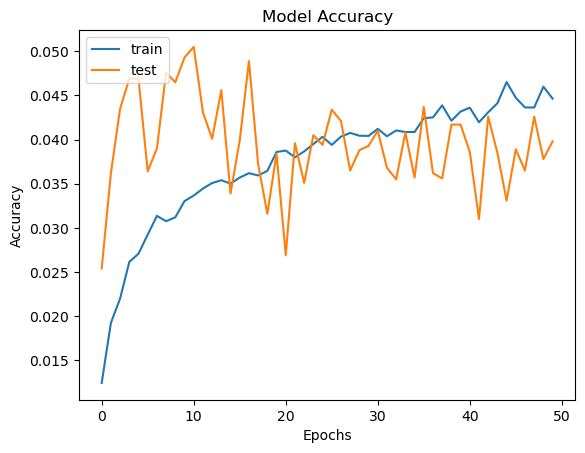

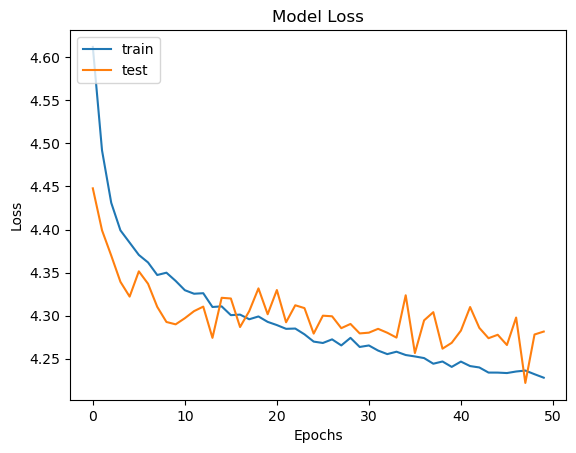

In [102]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
# save training history to dictionary
all_history['case_10_train'] = history.history

In [104]:
# train model results
print('Train loss:', all_history['case_10_train']['loss'][-1])
print('Train acc:', all_history['case_10_train']['accuracy'][-1])

Train loss: 4.228038311004639
Train acc: 0.04464000090956688


In [105]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 4.281581401824951
Test acc: 0.039799999445676804


In [106]:
# save testing history to dictionary
all_history['case_10_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.11. Case 11
- MLP Configuration: (1024, 512, 256).
- Dropout: 0.6.
- Optimizer: adam.

In [107]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(100))
model.add(Activation('softmax'))

In [108]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [109]:
# check model architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_39 (Activation)  (None, 1024)              0         
                                                                 
 dropout_20 (Dropout)        (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 activation_40 (Activation)  (None, 512)               0         
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)             

In [110]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [111]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


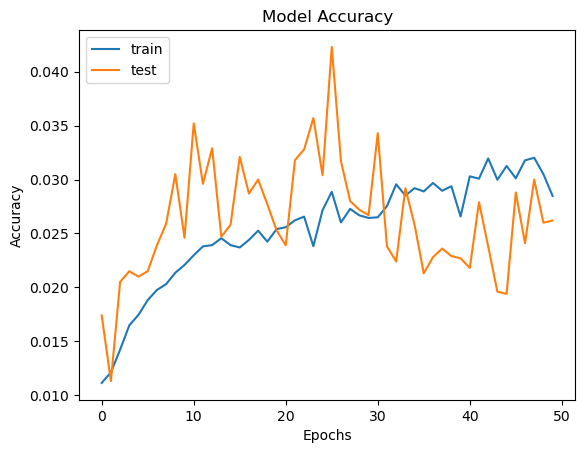

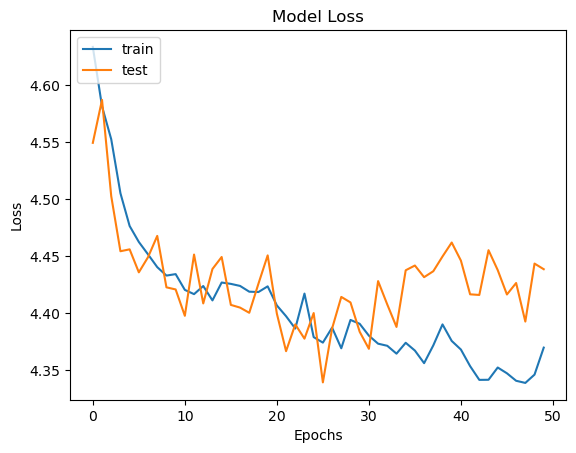

In [112]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
# save training history to dictionary
all_history['case_11_train'] = history.history

In [114]:
# train model results
print('Train loss:', all_history['case_11_train']['loss'][-1])
print('Train acc:', all_history['case_11_train']['accuracy'][-1])

Train loss: 4.370045185089111
Train acc: 0.02848000079393387


In [115]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 4.4387993812561035
Test acc: 0.026200000196695328


In [116]:
# save testing history to dictionary
all_history['case_1_test'] = {'test_loss': test_loss, 'test_accuracy': test_acc}

## 2.12. Case 12
- MLP Configuration: (1024, 512, 256, 128).
- Dropout: 0.6.
- Optimizer: adam.

In [117]:
# construct a model
model = Sequential()
model.add(Dense(1024, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(100))
model.add(Activation('softmax'))

In [118]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
# check model architecture
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 1024)              3146752   
                                                                 
 activation_43 (Activation)  (None, 1024)              0         
                                                                 
 dropout_23 (Dropout)        (None, 1024)              0         
                                                                 
 dense_44 (Dense)            (None, 512)               524800    
                                                                 
 activation_44 (Activation)  (None, 512)               0         
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)             

In [120]:
# train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

In [121]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


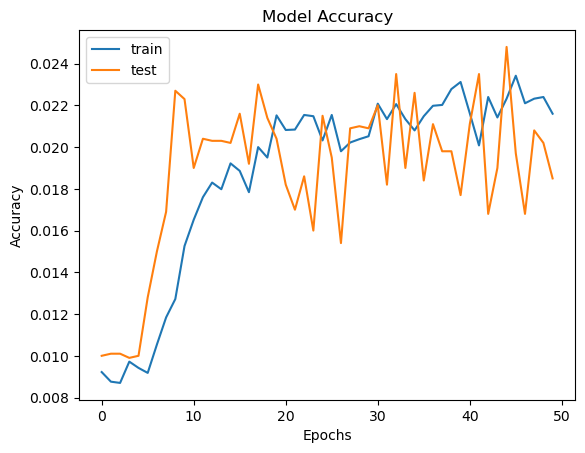

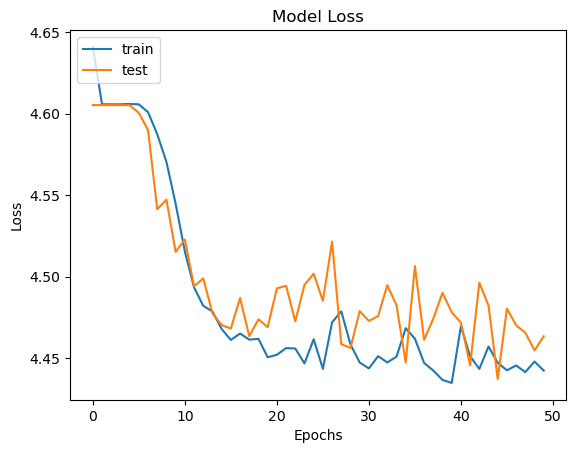

In [122]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
# save training history to dictionary
all_history['case_12_train'] = history.history

In [124]:
# train model results
print('Train loss:', all_history['case_12_train']['loss'][-1])
print('Train acc:', all_history['case_12_train']['accuracy'][-1])

Train loss: 4.442379474639893
Train acc: 0.02160000056028366


In [125]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 4.463394641876221
Test acc: 0.01850000023841858


In [126]:
# save testing history to dictionary
all_history['case_12_train'] = {'test_loss': test_loss, 'test_accuracy': test_acc}